In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import itertools
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
tqdm.pandas()

> 이 코드는 threshold를 구할 때 필요한 csv file을 생성한다

- csv file에는 같은 사람 3000 pairs, 다른 사람 3000pairs에 대하여 facenet을 이용해 구한 거리 값을 저장
- 결과물(outputs)
    - 동양인 csv file = `pair_with_dist_Asian.csv`
    - 서양인 csv file = `pair_with_dist_lfw.csv`

---
# 2. 서양인 데이터 
- lfw (funneld)
- 같은 사람 3000 pairs, 다른 사람 3000 pairs 

### Data set

In [ ]:
%%time
import os
data_path = '/content/drive/My Drive/기업프로젝트-라젠/data/lfw/'
ids = os.listdir(data_path)

idendities = {}
for id in ids:
    idendities[id] = os.listdir(data_path + id)

CPU times: user 271 ms, sys: 387 ms, total: 658 ms
Wall time: 2.11 s


(array([5.713e+03, 2.500e+01, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <a list of 10 Patch objects>)

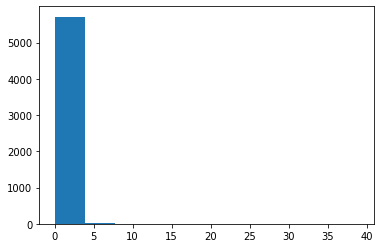

In [ ]:
num_pics = [len(folder) for folder in list(idendities.values())]

import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(num_pics)

In [ ]:
len(idendities)

5749

### Positive samples
Find different photos of same people


In [ ]:
positives = []

for key, values in idendities.items():
    
    #print(key)
    for i in range(0, len(values)-1):
        for j in range(i+1, len(values)):
            # print(key + '/' + values[i] + " and " + key + '/' + values[j])
            positive = []
            positive.append(key + '/' + values[i])
            positive.append(key + '/' + values[j])
            positives.append(positive)

In [ ]:
positives = pd.DataFrame(positives, columns = ["file_x", "file_y"])
positives["decision"] = "Yes"

In [ ]:
positives

,file_x,file_y,decision
0,Augusto_Pinochet/Augusto_Pinochet_0001.jpg,Augusto_Pinochet/Augusto_Pinochet_0002.jpg,Yes
1,Azra_Akin/Azra_Akin_0004.jpg,Azra_Akin/Azra_Akin_0002.jpg,Yes
2,Azra_Akin/Azra_Akin_0004.jpg,Azra_Akin/Azra_Akin_0003.jpg,Yes
3,Azra_Akin/Azra_Akin_0004.jpg,Azra_Akin/Azra_Akin_0001.jpg,Yes
4,Azra_Akin/Azra_Akin_0002.jpg,Azra_Akin/Azra_Akin_0003.jpg,Yes
...,...,...,...
7520,Aaron_Peirsol/Aaron_Peirsol_0001.jpg,Aaron_Peirsol/Aaron_Peirsol_0002.jpg,Yes
7521,Aaron_Peirsol/Aaron_Peirsol_0001.jpg,Aaron_Peirsol/Aaron_Peirsol_0004.jpg,Yes
7522,Aaron_Peirsol/Aaron_Peirsol_0003.jpg,Aaron_Peirsol/Aaron_Peirsol_0002.jpg,Yes
7523,Aaron_Peirsol/Aaron_Peirsol_0003.jpg,Aaron_Peirsol/Aaron_Peirsol_0004.jpg,Yes


### Negative samples
Compare photos of different people

In [ ]:
samples_list = list(idendities.values())

In [ ]:
negatives = []
ids_keys_list = list(idendities.keys())
for i in range(0, len(idendities) - 1):
    for j in range(i+1, len(idendities)):
        #print(samples_list[i], " vs ",samples_list[j]) 
        cross_product = itertools.product(samples_list[i], samples_list[j])
        cross_product = list(cross_product)
        #print(cross_product)
        
        for cross_sample in cross_product:
            # print(ids_keys_list[i] + '/' + cross_sample[0] + " vs " + ids_keys_list[j] + '/' + cross_sample[1])
            negative = []
            negative.append(ids_keys_list[i] + '/' + cross_sample[0])
            negative.append(ids_keys_list[j] + '/' + cross_sample[1])
            negatives.append(negative)
        

In [ ]:
negatives = pd.DataFrame(negatives, columns = ["file_x", "file_y"])
negatives["decision"] = "No"

In [ ]:
negatives.head()

,file_x,file_y,decision
0,Augusto_Pinochet/Augusto_Pinochet_0001.jpg,Austin_Kearns/Austin_Kearns_0001.jpg,No
1,Augusto_Pinochet/Augusto_Pinochet_0002.jpg,Austin_Kearns/Austin_Kearns_0001.jpg,No
2,Augusto_Pinochet/Augusto_Pinochet_0001.jpg,Azra_Akin/Azra_Akin_0004.jpg,No
3,Augusto_Pinochet/Augusto_Pinochet_0001.jpg,Azra_Akin/Azra_Akin_0002.jpg,No
4,Augusto_Pinochet/Augusto_Pinochet_0001.jpg,Azra_Akin/Azra_Akin_0003.jpg,No


### Merge Positives and Negative Samples

In [ ]:
df = pd.concat([positives, negatives]).reset_index(drop = True)

In [ ]:
df.shape

(554931, 3)

In [ ]:
df.decision.value_counts()

No     547406
Yes      7525
Name: decision, dtype: int64

In [ ]:
df.file_x = "/content/drive/My Drive/main_proj/라젠/deepface/tests/lfw_funneled_samples/"+df.file_x
df.file_y = "/content/drive/My Drive/main_proj/라젠/deepface/tests/lfw_funneled_samples/"+df.file_y

In [ ]:
df.iloc[0, 0]

'/content/drive/My Drive/main_proj/라젠/deepface/tests/lfw_funneled_samples/Augusto_Pinochet/Augusto_Pinochet_0001.jpg'

In [ ]:
df

,file_x,file_y,decision
0,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,Yes
1,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,Yes
2,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,Yes
3,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,Yes
4,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,Yes
...,...,...,...
554926,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,No
554927,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,No
554928,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,No
554929,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,No


In [ ]:
# 같은 얼굴 3000개, 다른 얼굴 3000개 pair만 남기기
selected_pos_df = df[df['decision']=='Yes'].sample(n=3000)
selected_neg_df = df[df['decision']=='No'].sample(n=3000)

selected_df = pd.concat([selected_pos_df, selected_neg_df]).reset_index(drop = True)

# DeepFace

In [ ]:
!pip install DeepFace
from deepface import DeepFace

In [ ]:
instances = selected_df[["file_x", "file_y"]].values.tolist()
print(instances[:10])

[['/content/drive/My Drive/main_proj/라젠/deepface/tests/lfw_funneled_samples/Ariel_Sharon/Ariel_Sharon_0075.jpg', '/content/drive/My Drive/main_proj/라젠/deepface/tests/lfw_funneled_samples/Ariel_Sharon/Ariel_Sharon_0022.jpg'], ['/content/drive/My Drive/main_proj/라젠/deepface/tests/lfw_funneled_samples/Ariel_Sharon/Ariel_Sharon_0055.jpg', '/content/drive/My Drive/main_proj/라젠/deepface/tests/lfw_funneled_samples/Ariel_Sharon/Ariel_Sharon_0033.jpg'], ['/content/drive/My Drive/main_proj/라젠/deepface/tests/lfw_funneled_samples/Ariel_Sharon/Ariel_Sharon_0059.jpg', '/content/drive/My Drive/main_proj/라젠/deepface/tests/lfw_funneled_samples/Ariel_Sharon/Ariel_Sharon_0056.jpg'], ['/content/drive/My Drive/main_proj/라젠/deepface/tests/lfw_funneled_samples/Abdullah_Gul/Abdullah_Gul_0015.jpg', '/content/drive/My Drive/main_proj/라젠/deepface/tests/lfw_funneled_samples/Abdullah_Gul/Abdullah_Gul_0007.jpg'], ['/content/drive/My Drive/main_proj/라젠/deepface/tests/lfw_funneled_samples/A

In [ ]:
model_name = "Facenet"
distance_metric = "euclidean_l2"
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric, enforce_detection=False)

Using Facenet model backend euclidean_l2 distance.
facenet_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1971Xk5RwedbudGgTIrGAL4F7Aifu7id1
To: /root/.deepface/weights/facenet_weights.h5
92.2MB [00:00, 176MB/s] 
Verification: 100%|██████████| 6000/6000 [26:29<00:00,  3.78it/s]


In [ ]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)

In [ ]:
selected_df["distance_l2"] = distances

In [ ]:
# selected_df.to_csv('pair_with_dist_lfw.csv', index=False)

In [ ]:
selected_df

,file_x,file_y,decision,distance_l2
0,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,Yes,0.6724
1,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,Yes,0.6943
2,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,Yes,0.8109
3,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,Yes,1.5055
4,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,Yes,1.2800
...,...,...,...,...
5995,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,No,1.3550
5996,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,No,1.4504
5997,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,No,1.5216
5998,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,No,1.1188


In [ ]:
selected_df.describe()

,distance_l2
count,6000.000000
mean,1.118442
std,0.305570
min,0.227400
25%,0.815075
50%,1.254150
75%,1.371925
max,1.629900


# ROC curve

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score

In [3]:
# selected_df = pd.read_csv('/content/drive/MyDrive/기업프로젝트-라젠/deepface/tests/pair_with_dist_lfw.csv')

In [5]:
encoder = LabelEncoder()
encoder.fit(selected_df['decision'])
selected_df_label_encoded = encoder.transform(selected_df['decision']) # 1='Yes' / 0='No'
selected_df['distance_l2_scaled'] = -selected_df['distance_l2']

In [6]:
fpr, tpr, thresholds = roc_curve(selected_df_label_encoded, selected_df['distance_l2_scaled'])
roc_auc = auc(fpr, tpr)

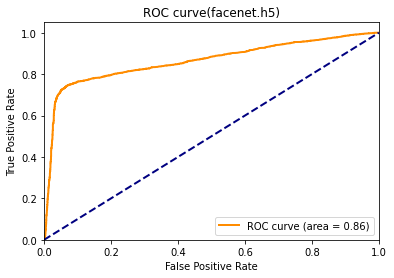

In [7]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve(facenet.h5)')
plt.legend(loc="lower right")
plt.show()